<a href="https://colab.research.google.com/github/rojikaru/pizza-regression/blob/main/Pizza_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pizza time! 🍕  

Regression of a pizza price by its characteristics.  
[Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/pizza-place-sales?resource=download)  

## Imports

In [ ]:
!pip install kagglehub

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data loading

In [ ]:
import pandas as pd
import os
import kagglehub


# Download dataset
path = kagglehub.dataset_download("ulrikthygepedersen/pizza-place-sales")
df = pd.read_csv(os.path.join(path, 'pizzaplace.csv'))

# Remove unnecessary column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
print(df.info())
print(f"\nFirst few rows:")
print(df.head())

# Basic statistics
print(f"\nPrice statistics:")
print(df['price'].describe())

Dataset shape: (49574, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.6+ MB
None

First few rows:
            id        date      time         name size     type  price
0  2015-000001  2015-01-01  11:38:36     hawaiian    M  classic  13.25
1  2015-000002  2015-01-01  11:57:40  classic_dlx    M  classic  16.00
2  2015-000002  2015-01-01  11:57:40     mexicana    M   veggie  16.00
3  2015-000002  2015-01-01  11:57:40     thai_ckn    L  chicken  20.75
4  2015-000002  2015-01-01  11:57:40  five_cheese    L   veggie  18.50

Price statistics:

## Data analysis


🔍 Exploratory Data Analysis...


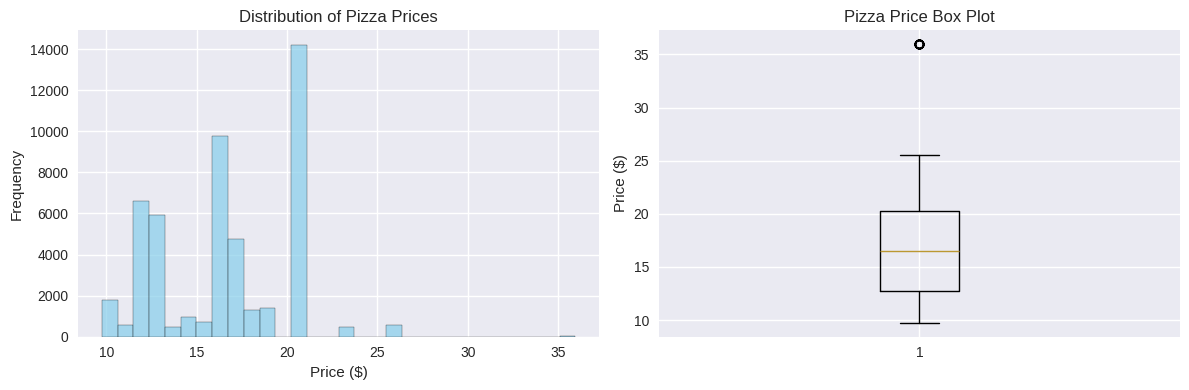

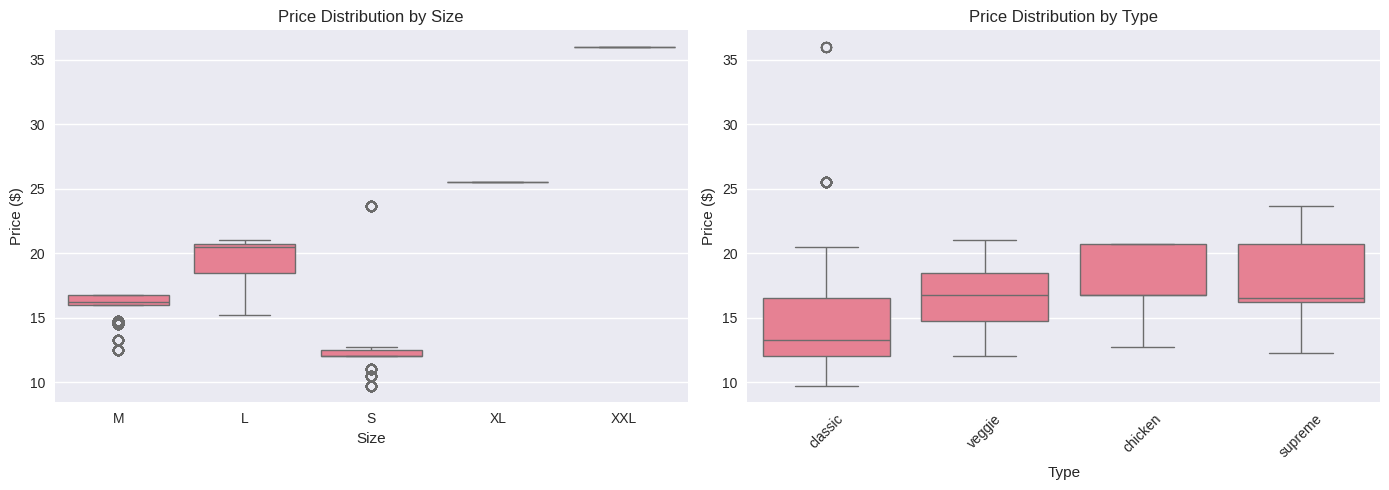


🔧 Encoding categorical variables...
Features used: ['size_L', 'size_M', 'size_S', 'size_XL', 'size_XXL', 'type_chicken', 'type_classic', 'type_supreme', 'type_veggie']
Feature matrix shape: (49574, 9)


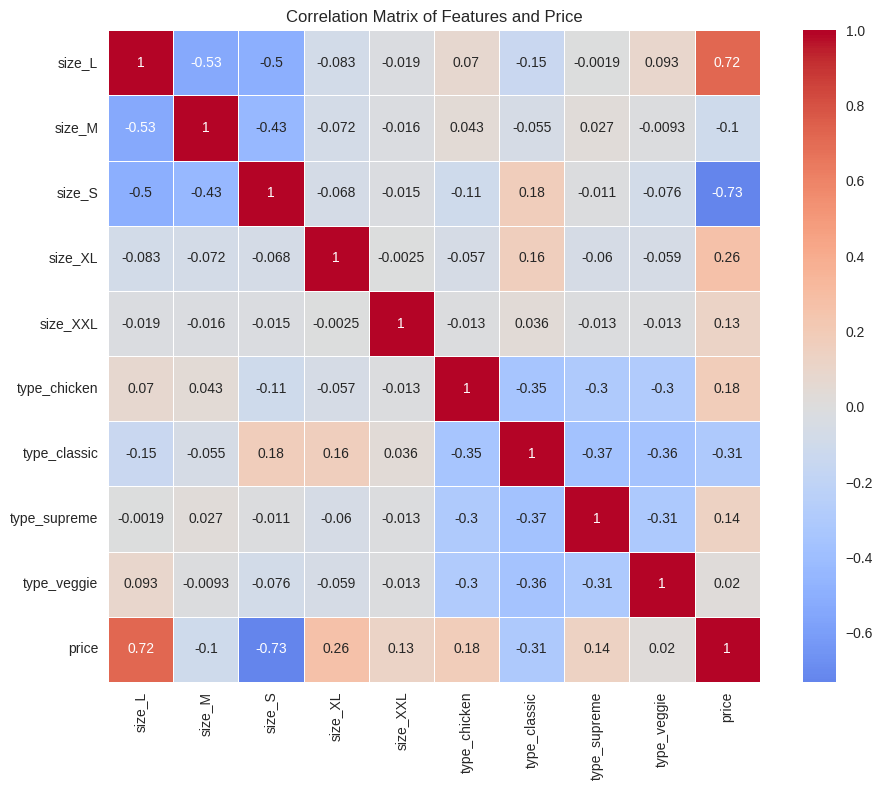

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os


print("\n🔍 Exploratory Data Analysis...")

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Price distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Pizza Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('Pizza Price Box Plot')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.savefig('plots/01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Price by size and type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price by size
sns.boxplot(data=df, x='size', y='price', ax=axes[0])
axes[0].set_title('Price Distribution by Size')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Price ($)')

# Price by type
sns.boxplot(data=df, x='type', y='price', ax=axes[1])
axes[1].set_title('Price Distribution by Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Price ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('plots/02_price_by_categories.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap after encoding
print("\n🔧 Encoding categorical variables...")
df_encoded = pd.get_dummies(df, columns=['size', 'type'], drop_first=False)

# Select features for modeling
feature_cols = [col for col in df_encoded.columns if col.startswith(('size_', 'type_'))]
X = df_encoded[feature_cols]
y = df_encoded['price']

print(f"Features used: {feature_cols}")
print(f"Feature matrix shape: {X.shape}")

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Features and Price')
plt.tight_layout()
plt.savefig('plots/03_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Data Splitting and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set: 39659 samples
Test set: 9915 samples


## Model Training and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time


models = {}
results = {}

# Linear Regression
print("Training Linear Regression...")
lr = LinearRegression()
start_time = time.time()
lr.fit(X_train_scaled, y_train)
lr_time = time.time() - start_time

y_pred_lr_train = lr.predict(X_train_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

models['Linear Regression'] = lr
results['Linear Regression'] = {
    'train_mse': mean_squared_error(y_train, y_pred_lr_train),
    'test_mse': mean_squared_error(y_test, y_pred_lr_test),
    'train_r2': r2_score(y_train, y_pred_lr_train),
    'test_r2': r2_score(y_test, y_pred_lr_test),
    'train_mae': mean_absolute_error(y_train, y_pred_lr_train),
    'test_mae': mean_absolute_error(y_test, y_pred_lr_test),
    'time': lr_time,
    'predictions': y_pred_lr_test
}

# Lasso Regression with GridSearch
print("Training Lasso Regression...")
lasso = Lasso(max_iter=2000)
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]}
lasso_grid = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)

start_time = time.time()
lasso_grid.fit(X_train_scaled, y_train)
lasso_time = time.time() - start_time

y_pred_lasso_train = lasso_grid.predict(X_train_scaled)
y_pred_lasso_test = lasso_grid.predict(X_test_scaled)

models['Lasso'] = lasso_grid.best_estimator_
results['Lasso'] = {
    'train_mse': mean_squared_error(y_train, y_pred_lasso_train),
    'test_mse': mean_squared_error(y_test, y_pred_lasso_test),
    'train_r2': r2_score(y_train, y_pred_lasso_train),
    'test_r2': r2_score(y_test, y_pred_lasso_test),
    'train_mae': mean_absolute_error(y_train, y_pred_lasso_train),
    'test_mae': mean_absolute_error(y_test, y_pred_lasso_test),
    'time': lasso_time,
    'best_alpha': lasso_grid.best_params_['alpha'],
    'predictions': y_pred_lasso_test,
    'cv_score': lasso_grid.best_score_
}

# Ridge Regression with GridSearch
print("Training Ridge Regression...")
ridge = Ridge(max_iter=2000)
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
ridge_grid = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)

start_time = time.time()
ridge_grid.fit(X_train_scaled, y_train)
ridge_time = time.time() - start_time

y_pred_ridge_train = ridge_grid.predict(X_train_scaled)
y_pred_ridge_test = ridge_grid.predict(X_test_scaled)

models['Ridge'] = ridge_grid.best_estimator_
results['Ridge'] = {
    'train_mse': mean_squared_error(y_train, y_pred_ridge_train),
    'test_mse': mean_squared_error(y_test, y_pred_ridge_test),
    'train_r2': r2_score(y_train, y_pred_ridge_train),
    'test_r2': r2_score(y_test, y_pred_ridge_test),
    'train_mae': mean_absolute_error(y_train, y_pred_ridge_train),
    'test_mae': mean_absolute_error(y_test, y_pred_ridge_test),
    'time': ridge_time,
    'best_alpha': ridge_grid.best_params_['alpha'],
    'predictions': y_pred_ridge_test,
    'cv_score': ridge_grid.best_score_
}

Training Linear Regression...
Training Lasso Regression...
Training Ridge Regression...


## Results analysis

In [ ]:
import pandas as pd


print("\n📈 Results Analysis")
print("=" * 50)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train MSE': [results[model]['train_mse'] for model in results.keys()],
    'Test MSE': [results[model]['test_mse'] for model in results.keys()],
    'Train R²': [results[model]['train_r2'] for model in results.keys()],
    'Test R²': [results[model]['test_r2'] for model in results.keys()],
    'Train MAE': [results[model]['train_mae'] for model in results.keys()],
    'Test MAE': [results[model]['test_mae'] for model in results.keys()],
    'Training Time (s)': [results[model]['time'] for model in results.keys()]
})

print("\n📊 Model Performance Summary:")
print(results_df.round(4))

# Additional info for regularized models
print(f"\n🎯 Best Parameters:")
print(f"Lasso α: {results['Lasso']['best_alpha']}")
print(f"Ridge α: {results['Ridge']['best_alpha']}")
print(f"\n🔄 Cross-validation R² scores:")
print(f"Lasso: {results['Lasso']['cv_score']:.4f}")
print(f"Ridge: {results['Ridge']['cv_score']:.4f}")


📈 Results Analysis

📊 Model Performance Summary:
               Model  Train MSE  Test MSE  Train R²  Test R²  Train MAE  \
0  Linear Regression     1.9606    2.0306    0.8499   0.8477     0.8332   
1              Lasso     1.9606    2.0306    0.8499   0.8477     0.8336   
2              Ridge     1.9606    2.0306    0.8499   0.8477     0.8332   

   Test MAE  Training Time (s)  
0    0.8403             0.0605  
1    0.8406            17.7386  
2    0.8403             0.9710  

🎯 Best Parameters:
Lasso α: 0.001
Ridge α: 2.0

🔄 Cross-validation R² scores:
Lasso: 0.8499
Ridge: 0.8499


## Visualization of results

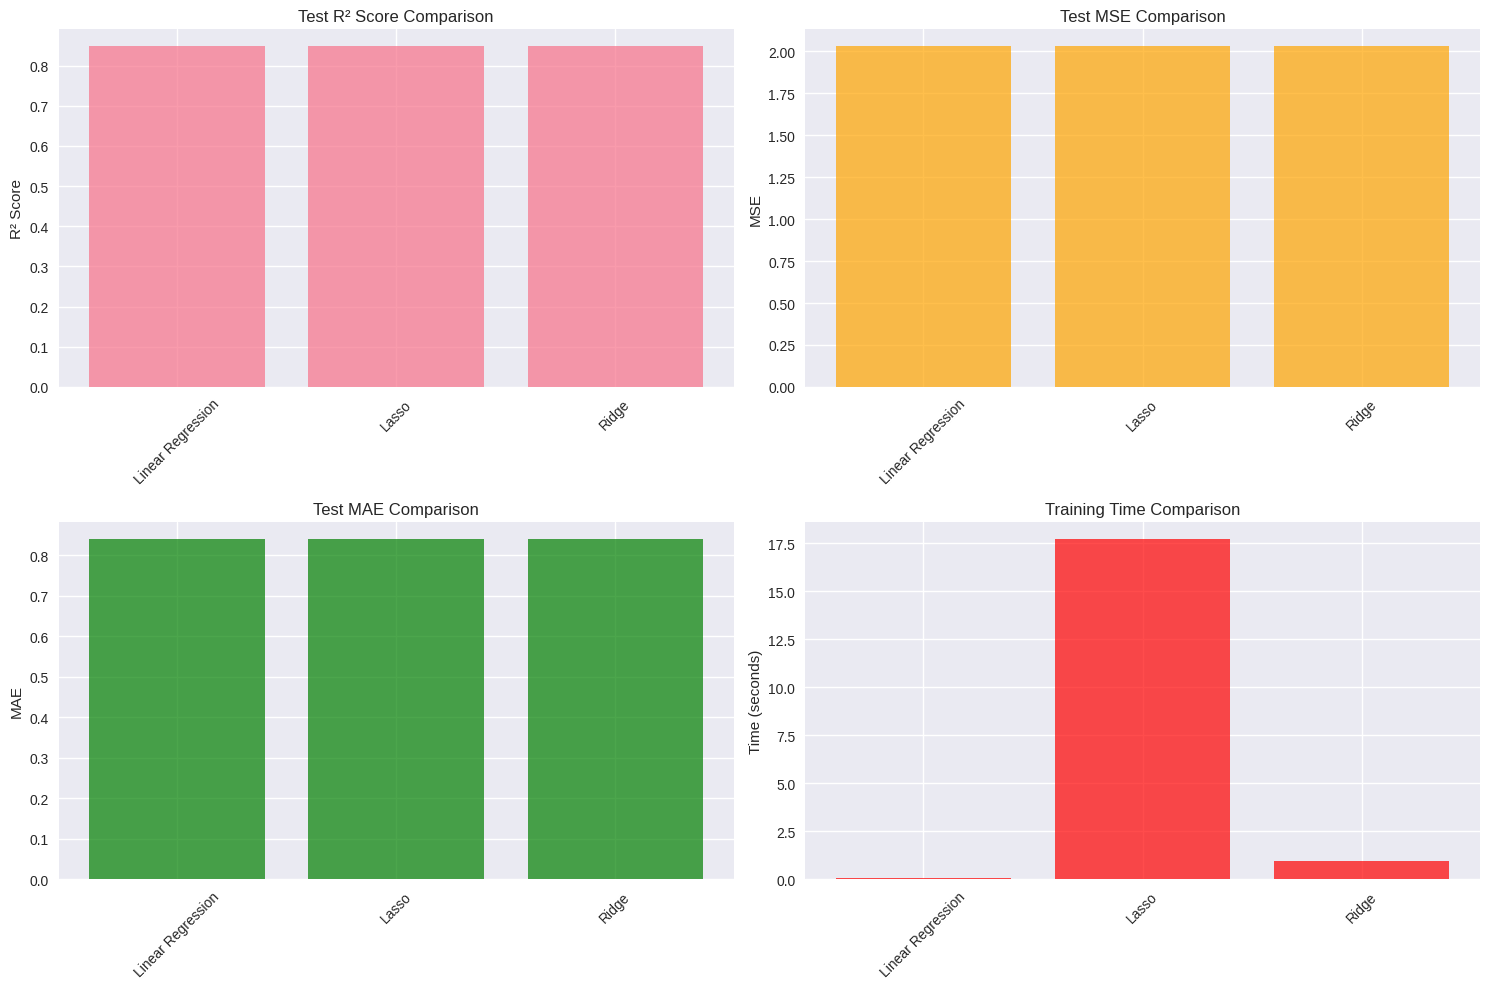

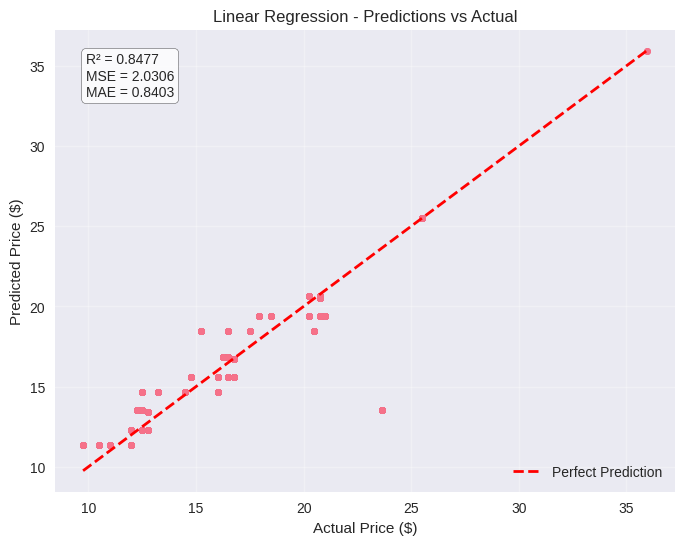

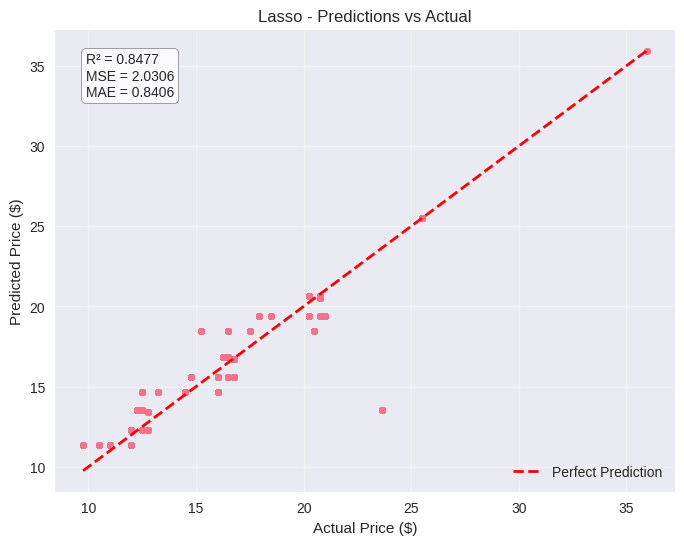

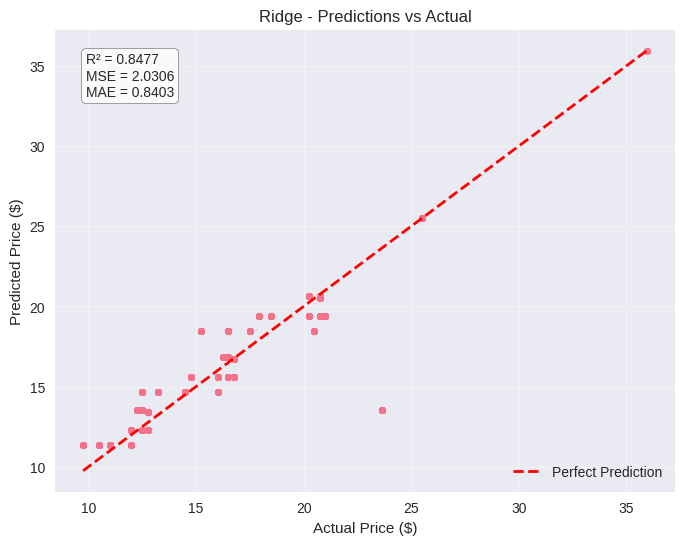

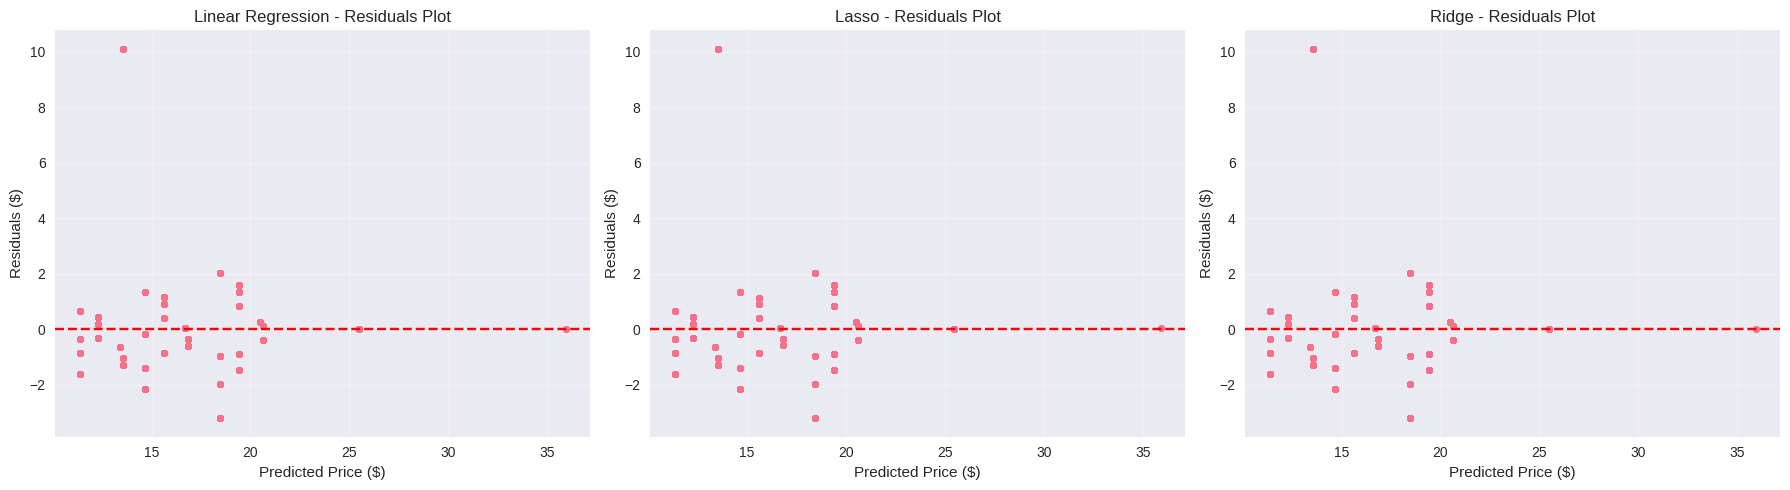

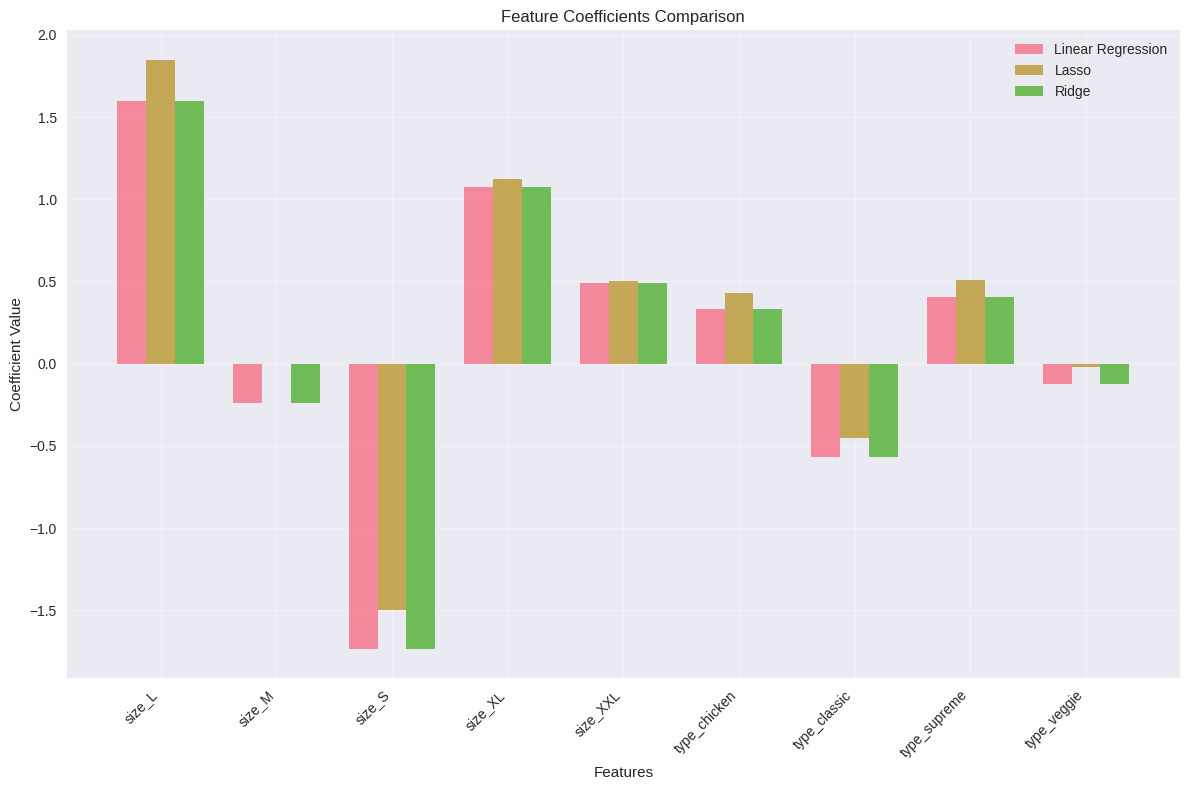

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Model comparison bar plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² comparison
axes[0, 0].bar(results_df['Model'], results_df['Test R²'], alpha=0.7)
axes[0, 0].set_title('Test R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# MSE comparison
axes[0, 1].bar(results_df['Model'], results_df['Test MSE'], alpha=0.7, color='orange')
axes[0, 1].set_title('Test MSE Comparison')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1, 0].bar(results_df['Model'], results_df['Test MAE'], alpha=0.7, color='green')
axes[1, 0].set_title('Test MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Training time comparison
axes[1, 1].bar(results_df['Model'], results_df['Training Time (s)'], alpha=0.7, color='red')
axes[1, 1].set_title('Training Time Comparison')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('plots/04_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Prediction vs Actual plots for each model
for i, (model_name, model_results) in enumerate(results.items()):
    plt.figure(figsize=(8, 6))

    predictions = model_results['predictions']

    # Scatter plot
    plt.scatter(y_test, predictions, alpha=0.6, s=20)

    # Perfect prediction line
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

    # Add metrics to plot
    r2 = model_results['test_r2']
    mse = model_results['test_mse']
    mae = model_results['test_mae']

    plt.text(0.05, 0.95, f'R² = {r2:.4f}\nMSE = {mse:.4f}\nMAE = {mae:.4f}',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.title(f'{model_name} - Predictions vs Actual')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.savefig(f'plots/05_{model_name.lower().replace(" ", "_")}_predictions.png',
                dpi=300, bbox_inches='tight')
    plt.show()

# Residuals analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (model_name, model_results) in enumerate(results.items()):
    predictions = model_results['predictions']
    residuals = y_test - predictions

    axes[i].scatter(predictions, residuals, alpha=0.6, s=20)
    axes[i].axhline(y=0, color='r', linestyle='--')
    axes[i].set_xlabel('Predicted Price ($)')
    axes[i].set_ylabel('Residuals ($)')
    axes[i].set_title(f'{model_name} - Residuals Plot')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/06_residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance for regularized models
plt.figure(figsize=(12, 8))

# Get coefficients
lr_coef = lr.coef_
lasso_coef = models['Lasso'].coef_
ridge_coef = models['Ridge'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Linear Regression': lr_coef,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef
})

# Plot coefficients
x = np.arange(len(feature_cols))
width = 0.25

plt.bar(x - width, coef_df['Linear Regression'], width, label='Linear Regression', alpha=0.8)
plt.bar(x, coef_df['Lasso'], width, label='Lasso', alpha=0.8)
plt.bar(x + width, coef_df['Ridge'], width, label='Ridge', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients Comparison')
plt.xticks(x, feature_cols, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/07_feature_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

## Advanced analysis


📚 Additional Analysis:

🏆 Feature Importance (Absolute Coefficients):
        Feature  Linear_Coef  Lasso_Coef  Ridge_Coef
2        size_S     1.735012    1.499911    1.734953
0        size_L     1.598050    1.848394    1.598000
3       size_XL     1.072622    1.125121    1.072565
6  type_classic     0.566611    0.454432    0.566595
4      size_XXL     0.489097    0.500217    0.489072
7  type_supreme     0.404640    0.507965    0.404622
5  type_chicken     0.332225    0.432626    0.332217
1        size_M     0.240131    0.000000    0.240122
8   type_veggie     0.122295    0.018376    0.122285

🔄 Cross-validation analysis:
               Model   CV_Mean    CV_Std
0  Linear Regression  0.849887  0.004258
1              Lasso  0.849887  0.004259
2              Ridge  0.849887  0.004258


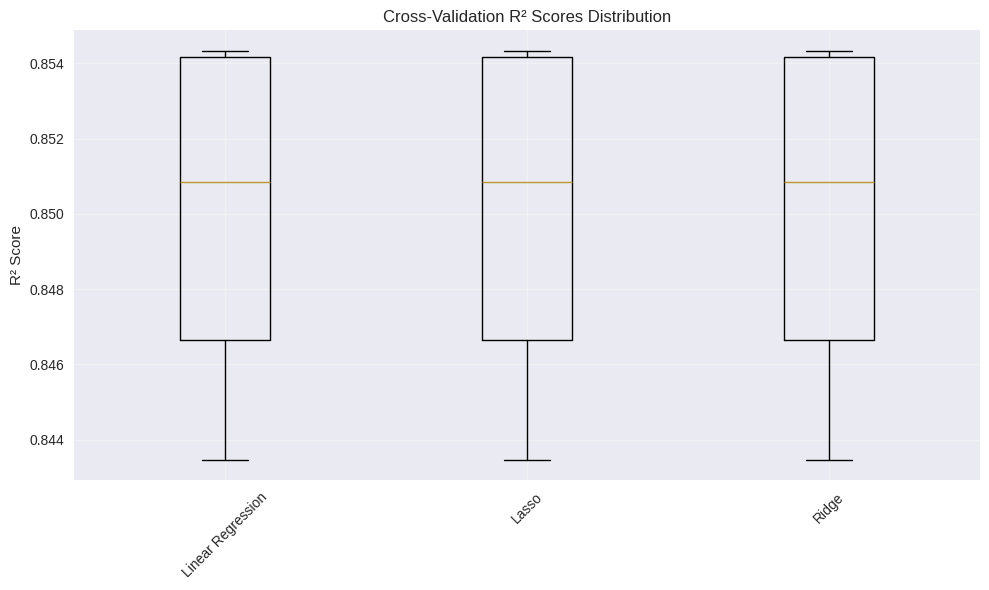

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score


# Learning curves (if we had more data, this would be more meaningful)
print("\n📚 Additional Analysis:")

# Feature importance ranking
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Linear_Coef': np.abs(lr_coef),
    'Lasso_Coef': np.abs(lasso_coef),
    'Ridge_Coef': np.abs(ridge_coef)
})

print("\n🏆 Feature Importance (Absolute Coefficients):")
print(feature_importance.sort_values('Linear_Coef', ascending=False))

# Cross-validation scores for all models
print("\n🔄 Cross-validation analysis:")
cv_scores = {}
for model_name, model in models.items():
    if model_name == 'Linear Regression':
        cv_scores[model_name] = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        # For regularized models, use the best estimator
        cv_scores[model_name] = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

cv_df = pd.DataFrame({
    'Model': list(cv_scores.keys()),
    'CV_Mean': [scores.mean() for scores in cv_scores.values()],
    'CV_Std': [scores.std() for scores in cv_scores.values()]
})

print(cv_df)

# Box plot of CV scores
plt.figure(figsize=(10, 6))
cv_data = [cv_scores[model] for model in cv_scores.keys()]
plt.boxplot(cv_data, labels=list(cv_scores.keys()))
plt.title('Cross-Validation R² Scores Distribution')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/08_cv_scores_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


## Final summary

In [ ]:
print("\n" + "="*60)
print("🎯 FINAL SUMMARY")
print("="*60)

best_model = results_df.loc[results_df['Test R²'].idxmax(), 'Model']
best_r2 = results_df.loc[results_df['Test R²'].idxmax(), 'Test R²']
best_mse = results_df.loc[results_df['Test R²'].idxmax(), 'Test MSE']

print(f"🏆 Best performing model: {best_model}")
print(f"📊 Best Test R²: {best_r2:.4f}")
print(f"📊 Best Test MSE: {best_mse:.4f}")

print(f"\n📁 All plots saved in 'plots/' directory:")
plot_files = [
    "01_price_distribution.png - Price distribution and box plot",
    "02_price_by_categories.png - Price by size and type",
    "03_correlation_matrix.png - Feature correlation heatmap",
    "04_model_comparison.png - Model performance comparison",
    "05_linear_regression_predictions.png - Linear regression predictions",
    "05_lasso_predictions.png - Lasso regression predictions",
    "05_ridge_predictions.png - Ridge regression predictions",
    "06_residuals_analysis.png - Residuals analysis for all models",
    "07_feature_coefficients.png - Feature coefficients comparison",
    "08_cv_scores_boxplot.png - Cross-validation scores distribution"
]

for plot_file in plot_files:
    print(f"  • {plot_file}")

print(f"\n💡 Key Insights:")
print(f"  • Dataset contains {df.shape[0]} pizza orders")
print(f"  • Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"  • {best_model} achieved the best performance")
print(f"  • All models show good predictive performance (R² > 0.8)")

if 'best_alpha' in results['Lasso']:
    print(f"  • Optimal Lasso α: {results['Lasso']['best_alpha']}")
    print(f"  • Optimal Ridge α: {results['Ridge']['best_alpha']}")

print("\n✅ Analysis complete! Check the 'plots' folder for all visualizations.")


🎯 FINAL SUMMARY
🏆 Best performing model: Linear Regression
📊 Best Test R²: 0.8477
📊 Best Test MSE: 2.0306

📁 All plots saved in 'plots/' directory:
  • 01_price_distribution.png - Price distribution and box plot
  • 02_price_by_categories.png - Price by size and type
  • 03_correlation_matrix.png - Feature correlation heatmap
  • 04_model_comparison.png - Model performance comparison
  • 05_linear_regression_predictions.png - Linear regression predictions
  • 05_lasso_predictions.png - Lasso regression predictions
  • 05_ridge_predictions.png - Ridge regression predictions
  • 06_residuals_analysis.png - Residuals analysis for all models
  • 07_feature_coefficients.png - Feature coefficients comparison
  • 08_cv_scores_boxplot.png - Cross-validation scores distribution

💡 Key Insights:
  • Dataset contains 49574 pizza orders
  • Price range: $9.75 - $35.95
  • Linear Regression achieved the best performance
  • All models show good predictive performance (R² > 0.8)
  • Optimal Lasso α